# San Francisco Crime Data Analysis -- Capstone Project for Coursera

In [132]:
# import the library
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [133]:
# read the Crime csv file
df_crime = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
df_crime.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/10/22 10:50:00 AM,2018/10/22,10:50,2018,Monday,2018/10/22 11:24:00 AM,72897505073,728975,180801798,182951518.0,II,Initial,NaN,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,VAN NESS AVE \ OAK ST,30705000.0,Northern,Tenderloin,6.0,37.775422,-122.419397,"(37.7754222198843, -122.41939688941916)"
1,2018/10/14 02:54:00 PM,2018/10/14,14:54,2018,Sunday,2018/10/24 01:10:00 PM,72980906303,729809,180807520,182971760.0,II,Initial,NaN,6303,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, $200-$950",Open or Active,PINTO AVE \ ARBALLO DR,23104000.0,Taraval,Lakeshore,7.0,37.720450,-122.483015,"(37.7204499957522, -122.48301534194144)"
2,2018/10/14 02:54:00 PM,2018/10/14,14:54,2018,Sunday,2018/10/24 01:10:00 PM,72980964070,729809,180807520,182971760.0,II,Initial,NaN,64070,Suspicious Occ,Suspicious Occ,Suspicious Occurrence,Open or Active,PINTO AVE \ ARBALLO DR,23104000.0,Taraval,Lakeshore,7.0,37.720450,-122.483015,"(37.7204499957522, -122.48301534194144)"
3,2018/10/18 04:40:00 PM,2018/10/18,16:40,2018,Thursday,2018/10/26 07:42:00 AM,73011316650,730113,180791014,182911410.0,IS,Initial Supplement,NaN,16650,Drug Offense,Drug Violation,Methamphetamine Offense,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,"(37.7751608100771, -122.40363551943442)"
4,2018/10/18 04:40:00 PM,2018/10/18,16:40,2018,Thursday,2018/10/26 07:42:00 AM,73011316710,730113,180791014,182911410.0,IS,Initial Supplement,NaN,16710,Drug Offense,Drug Violation,"Narcotics Paraphernalia, Possession of",Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,"(37.7751608100771, -122.40363551943442)"


#### Categorize the crime data by neighborhoods and plot it

In [134]:
# sumarize the by Neighborhood
df_crime_by_neighborhood = df_crime['Analysis Neighborhood'].value_counts()
print(df_crime_by_neighborhood)

# top 10 crime neighborhoods and the incidents number
top_10_crime_neighborhood = df_crime_by_neighborhood.iloc[0:10]

# top 10 crime neighborhoods name as list
top_10_neighbor = list(top_10_crime_neighborhood.index)

Mission                           21541
Tenderloin                        19111
Financial District/South Beach    17493
South of Market                   16266
Bayview Hunters Point             10484
North Beach                        6069
Western Addition                   5754
Sunset/Parkside                    5594
Castro/Upper Market                5579
Nob Hill                           5005
Hayes Valley                       4606
Russian Hill                       4337
Marina                             3921
Outer Richmond                     3693
Chinatown                          3616
West of Twin Peaks                 3551
Mission Bay                        3201
Haight Ashbury                     3122
Bernal Heights                     3045
Excelsior                          3030
Potrero Hill                       2943
Pacific Heights                    2863
Outer Mission                      2506
Inner Richmond                     2402
Lone Mountain/USF                  2192


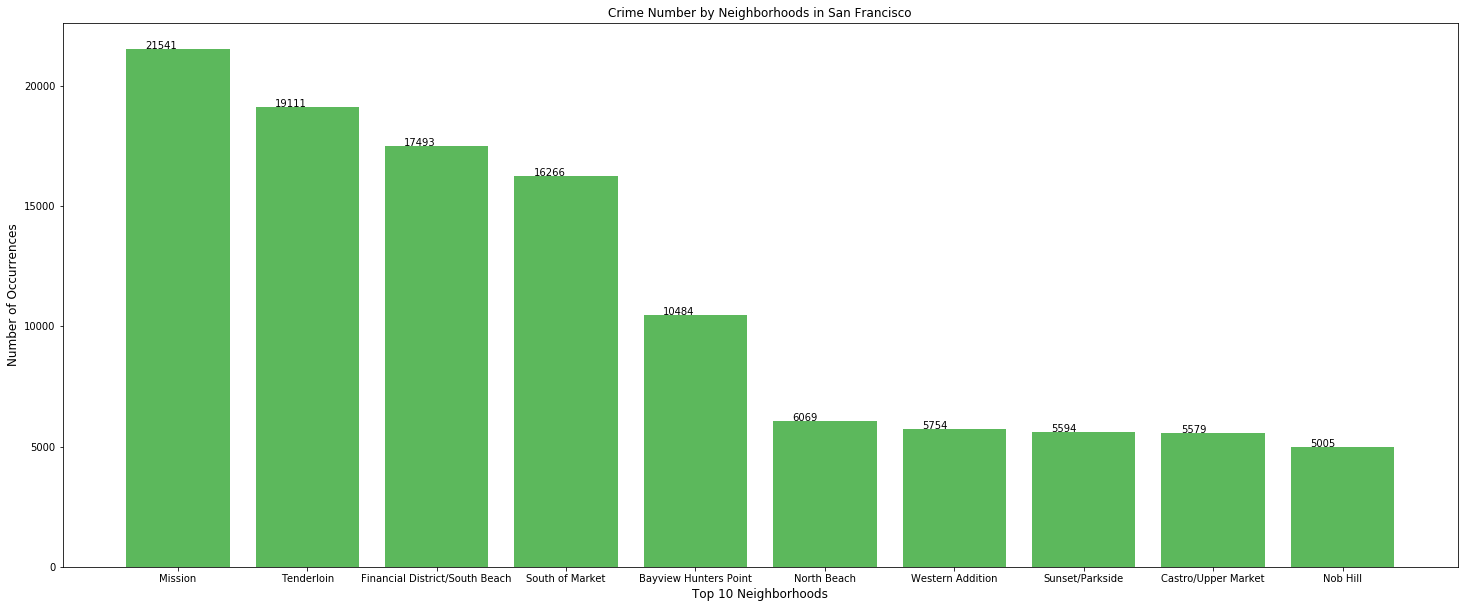

In [135]:
# Plot the data
plt.figure(figsize=(25,10)) 
for i in range(len(top_10_neighbor)):
    plt.bar(i, top_10_crime_neighborhood[top_10_neighbor[i]], color='#5cb85c')
    plt.text(i-0.25, top_10_crime_neighborhood[top_10_neighbor[i]], top_10_crime_neighborhood[top_10_neighbor[i]])
        
plt.title('Crime Number by Neighborhoods in San Francisco')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Top 10 Neighborhoods', fontsize=12)   
plt.xticks(np.arange(10), top_10_neighbor)
plt.show()

From this plot, it is obvious that Mission neighborhood has the highest crime rate, followed by Tenderioin, Financial District, SOMA and Bayview Hunters point. The first 5 neighborhoods count for a large portion of the total crime.

In [136]:
# Plot the data distribution on Map for some sample data
import folium
from folium import plugins

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

In [137]:
# get the first 1000 crimes in the df_incidents dataframe
limit = 1000
df_incidents = df_crime.iloc[0:limit, :]
df_incidents.dropna(subset=['Latitude', 'Longitude'], how='all', inplace = True)
df_incidents.dropna(subset=['Incident Category'], how='all', inplace = True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [138]:
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Latitude, df_incidents.Longitude, df_incidents['Incident Category']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Even from the sample 1000 data, it is clear that Mission has the most crime. 

#### Categorize crime data by Incident Category

In [139]:
df_crime_by_category = df_crime['Incident Category'].value_counts()
print(df_crime_by_category)

# top 10 crime category and the incidents number
top_10_crime_category = df_crime_by_category.iloc[0:10]

# top 10 crime category name as list
top_10_category = list(top_10_crime_category.index)

Larceny Theft                                 60191
Other Miscellaneous                           15022
Non-Criminal                                  12080
Assault                                       11430
Malicious Mischief                            11135
Burglary                                       8760
Warrant                                        7249
Lost Property                                  7111
Motor Vehicle Theft                            6651
Fraud                                          5611
Recovered Vehicle                              5519
Drug Offense                                   5157
Robbery                                        4617
Missing Person                                 4602
Offences Against The Family And Children       3760
Suspicious Occ                                 3463
Disorderly Conduct                             3315
Traffic Violation Arrest                       2618
Miscellaneous Investigation                    1657
Other Offens

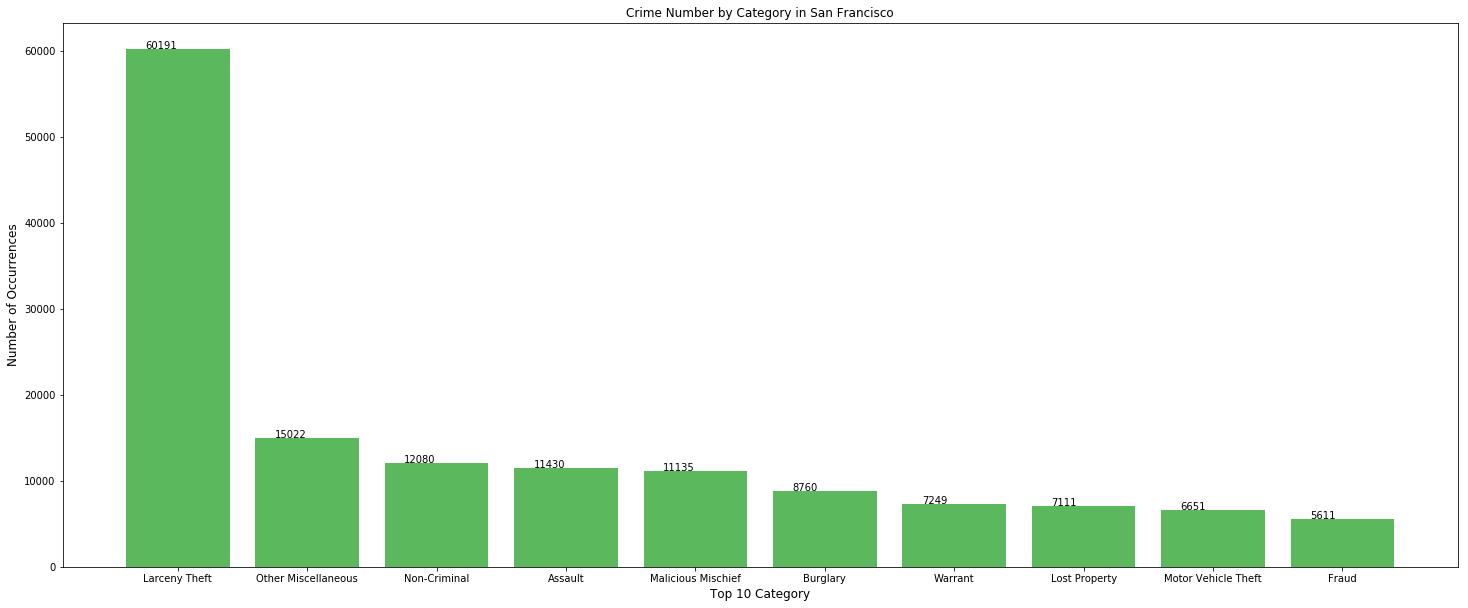

In [140]:
# Plot the data
plt.figure(figsize=(25,10)) 
for i in range(len(top_10_category)):
    plt.bar(i, top_10_crime_category[top_10_category[i]], color='#5cb85c')
    plt.text(i-0.25, top_10_crime_category[top_10_category[i]], top_10_crime_category[top_10_category[i]])
        
plt.title('Crime Number by Category in San Francisco')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Top 10 Category', fontsize=12)   
plt.xticks(np.arange(10), top_10_category)
plt.show()

From this plot, it is obvious that Larceny Theft is far more than other categories. 
Other Miscellaneous and Non-Criminal could include a lot of sub-categories so the number is just a reference.
The second largest is Assault when we skip Other Miscellaneous and Non-Criminal, followed by Malicious Mischief, Burglary, etc. 

#### Categorize the crime data by month and plot it

In [141]:
# When we calculate the number of incidents in each month, we calculate the number of incidents in each day first
df_crime_day_fre = df_crime['Incident Date'].value_counts()

# Total days is 468, it means the timespan of the data is more than one year. 
total_days = len(df_crime_day_fre)

In [142]:
# We store the number of incidents in each month in a dictionary
df_crime_by_month = {}

for i in range(total_days):
    month = df_crime_day_fre.index[i][0:7]
    if month in df_crime_by_month:
        df_crime_by_month[month] += df_crime_day_fre.iloc[i]
    else:
        df_crime_by_month[month] = df_crime_day_fre.iloc[i]

# 2019/04 has above 4000 incidents and it is obvious the data is incomplete and we drop it
del df_crime_by_month['2019/04']

Plot the distribution of crime by month from 2018/01 to 2019/03

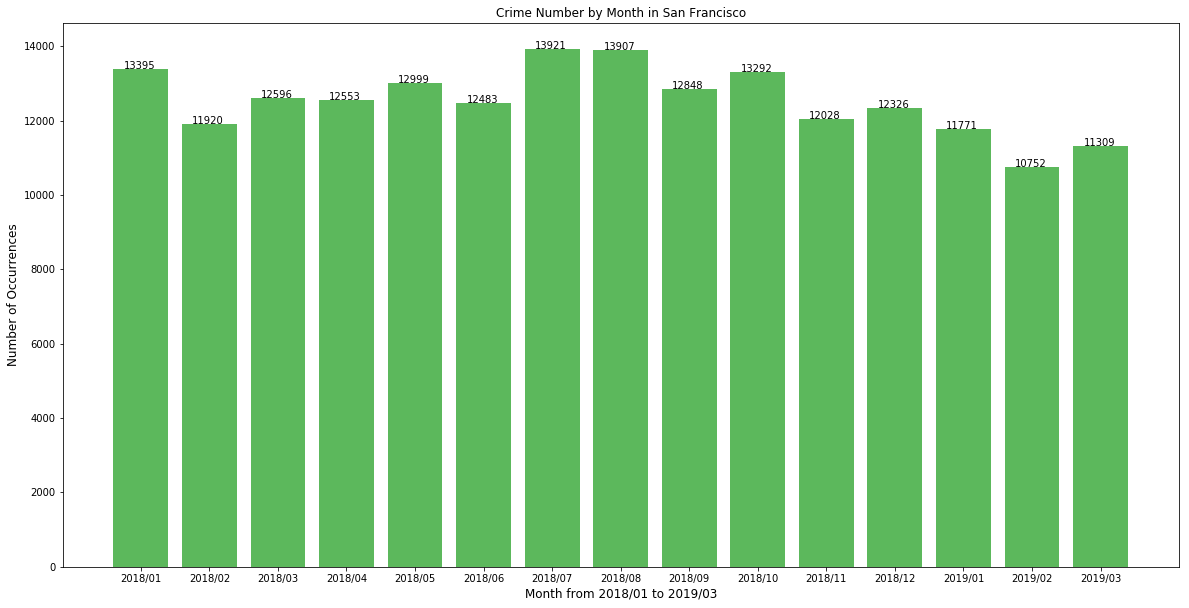

In [143]:
months = sorted(df_crime_by_month.keys())
plt.figure(figsize=(20,10)) 
for i in range(len(months)):
    plt.bar(i, df_crime_by_month[months[i]], color='#5cb85c')
    plt.text(i-0.25, df_crime_by_month[months[i]], df_crime_by_month[months[i]])
        
plt.title('Crime Number by Month in San Francisco')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month from 2018/01 to 2019/03', fontsize=12)   
plt.xticks(np.arange(15), months)
plt.show()

From this plot, it can be seen that during the summer months, the crime rates are the highest. 
Also, the beginning of the year seems to have high crime rate relative to the coming month.
Another thing we can notice is for the repeating months from Jan to Mar in 2018 and 2019, the trend is the same. 

#### Categorize the crime data by day of week and plot it

In [144]:
df_crime_day_of_week = df_crime['Incident Day of Week'].value_counts()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

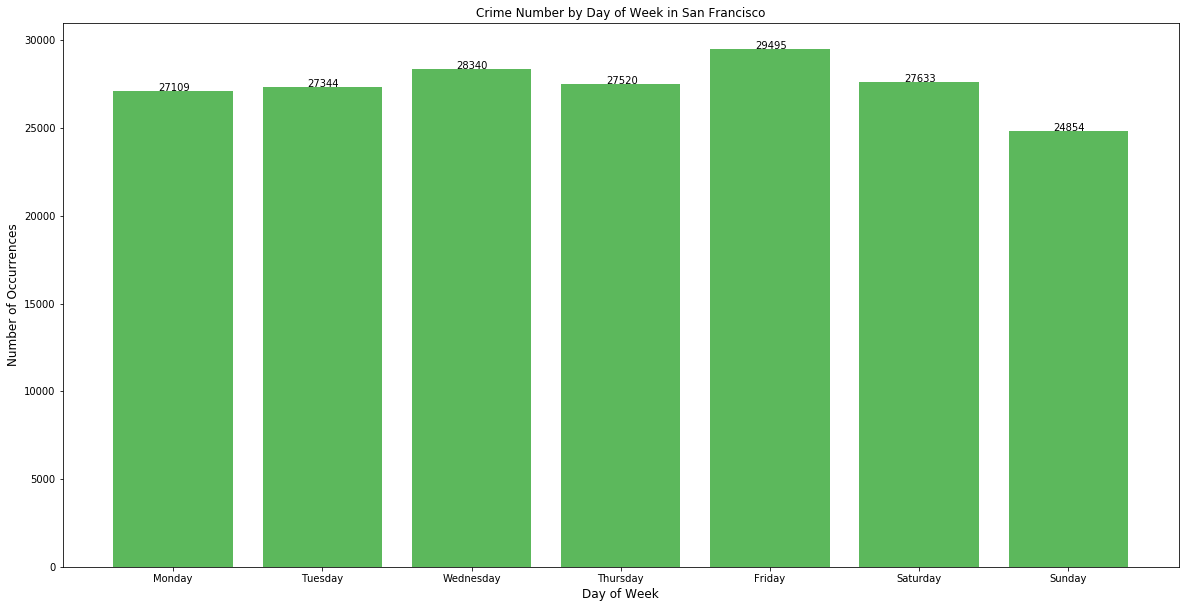

In [145]:
plt.figure(figsize=(20,10)) 
for i in range(len(days)):
    plt.bar(i, df_crime_day_of_week[days[i]], color='#5cb85c')
    plt.text(i-0.1, df_crime_day_of_week[days[i]], df_crime_day_of_week[days[i]])
        
plt.title('Crime Number by Day of Week in San Francisco')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)   
plt.xticks(np.arange(7), days)
plt.show()

It seems that starting from Wednesday towards Saturday, the crime rates are higher than the beginning of the week.

#### Categorize the crime data by time of the day and plot it

In [130]:
# We store the number of incidents in each hour in a dictionary
df_crime_by_hour = {}

for i in range(len(df_crime)):
    hour = df_crime.iloc[i]['Incident Time'][0:2]
    if hour in df_crime_by_hour:
        df_crime_by_hour[hour] += 1
    else:
        df_crime_by_hour[hour] = 1

df_crime_by_hour

{'10': 8957,
 '14': 10163,
 '16': 11068,
 '07': 4967,
 '22': 8294,
 '03': 3042,
 '09': 7949,
 '23': 7096,
 '08': 7092,
 '12': 12199,
 '13': 10229,
 '17': 11746,
 '20': 10287,
 '11': 9559,
 '18': 12111,
 '19': 11307,
 '15': 10816,
 '21': 8923,
 '00': 9448,
 '01': 4946,
 '02': 4044,
 '04': 2496,
 '05': 2416,
 '06': 3140}

Plot the distribution of crime by hour throughout the day

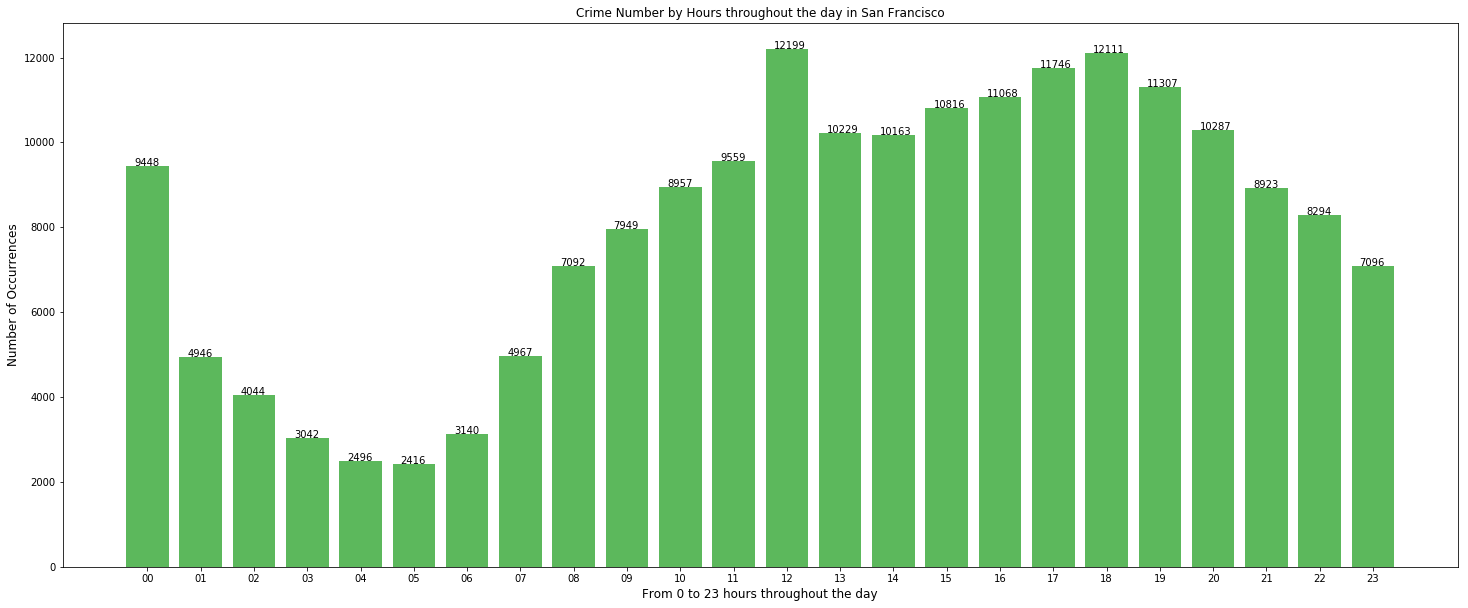

In [131]:
hours = sorted(df_crime_by_hour.keys())
plt.figure(figsize=(25,10)) 
for i in range(len(hours)):
    plt.bar(i, df_crime_by_hour[hours[i]], color='#5cb85c')
    plt.text(i-0.25, df_crime_by_hour[hours[i]], df_crime_by_hour[hours[i]])
        
plt.title('Crime Number by Hours throughout the day in San Francisco')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('From 0 to 23 hours throughout the day', fontsize=12)   
plt.xticks(np.arange(24), hours)
plt.show()

This plot is very informative. 
-  From 5am in the morning to 12pm at noon, the crime number is steadily climbing up, to the peak at noon.
-  Then it drops at 1pm, and goes up to peak at 6pm in the afternoon. 
-  Then it drops from that time to 11pm steadily. 
-  Then at midnight, it jumps again.
-  And after that, it steadily drops to 5am. 
-  And a new day starts.